# Card Fraud Detection
Angela Remolina | Person code: 10992373

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

## 🔎 Data Exploration

In [2]:
# Load data
# data = pd.read_csv('creditcard.csv')
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Let's see information about this dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Let's see the class count, where 0 = Regular transaction, 1 = Fraudulent transaction/

In [4]:
class_counts = data['Class'].value_counts()
class_labels = ['Non-Fraud', 'Fraud']
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

We have 284315 regular transactions and 492 fraudalent transactions, let's see this distribution of the data graphically

([<matplotlib.axis.XTick at 0x78ec59deb010>,
 [Text(0, 0, 'Non-Fraud'), Text(1, 0, 'Fraud')])

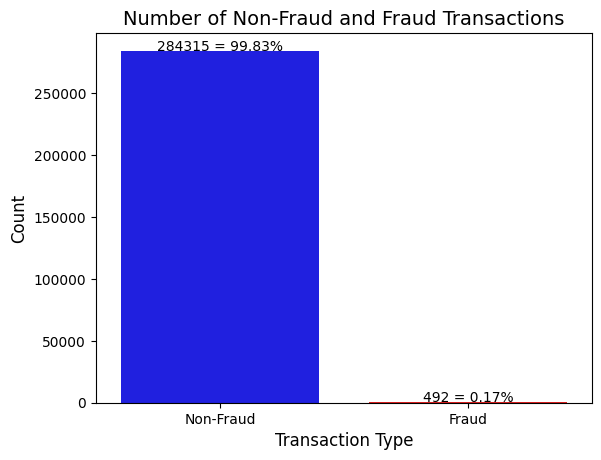

In [5]:
# Plot the bar plot for the number of frauds and non-frauds with count on top of the bars
colors = ['blue', 'red']
sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors)

# Add count labels on top of the bars
for i, count in enumerate(class_counts.values):
    percentage = count/len(data) * 100
    plt.text(i, count, f"{count} = {percentage:.2f}%", ha='center')

# Customize the plot
plt.title('Number of Non-Fraud and Fraud Transactions', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], class_labels, fontsize=10)

The bar plot before makes the problem seem insignificant since the fraudulent transaction are really little in comparison, but let's see the amount in euros "lost" in fraudulent transactions

In [6]:
# sum the amount in cash $$ of fraud and non-fraud transactions
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]
fraud_amount = fraud['Amount'].sum()
non_fraud_amount = non_fraud['Amount'].sum()
fraud_amount, non_fraud_amount

(60127.97, 25102462.04)

In [7]:
# Check if data is normalized
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


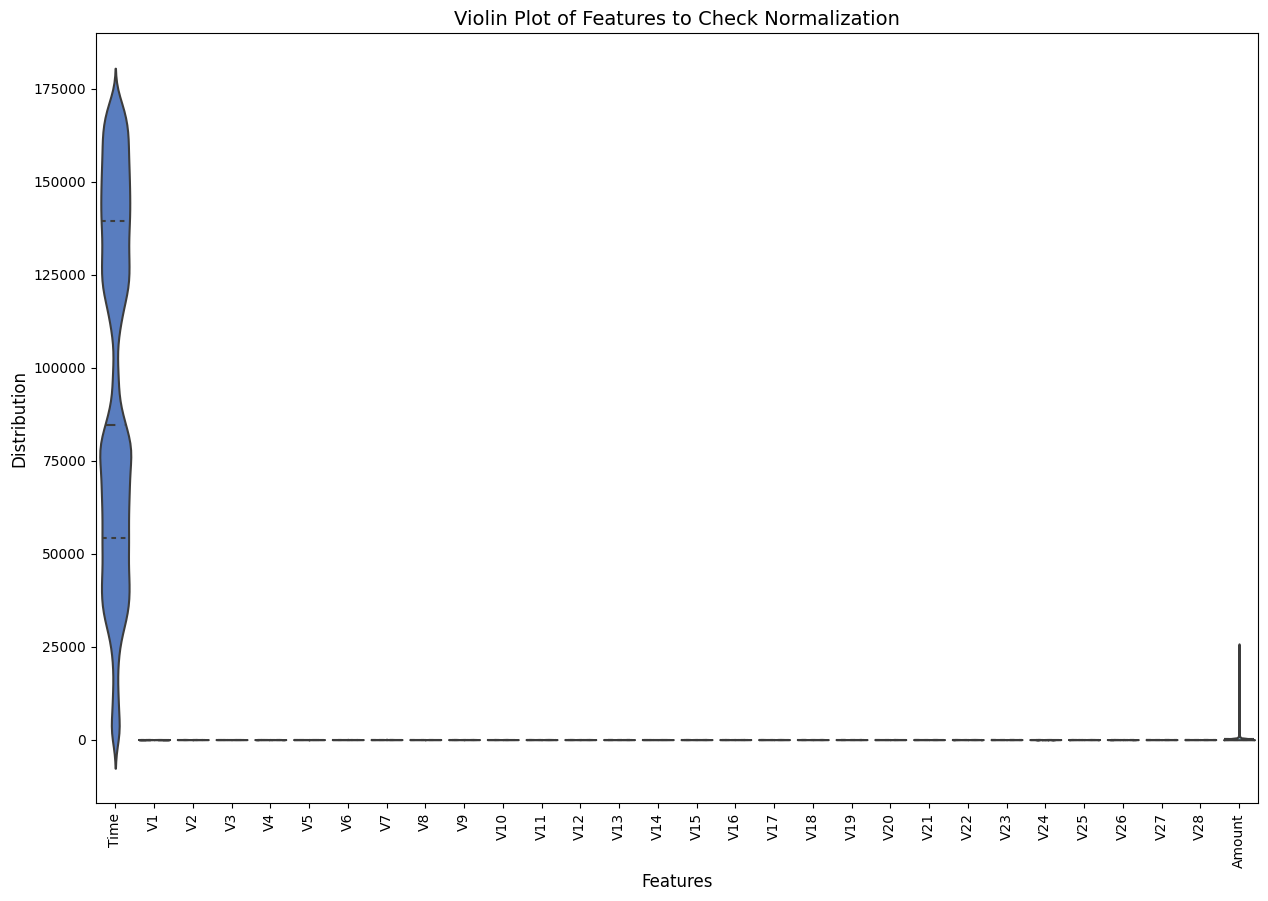

In [8]:
# violin plot for features
plt.figure(figsize=(15, 10))
sns.violinplot(data=data.drop(['Class'], axis=1), scale='width', inner='quartile', palette='muted')
plt.title('Violin Plot of Features to Check Normalization', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## 🧹 Data preprocessing

In [9]:
X = data.drop(['Class'], axis=1)  # Features (Excluding 'Class')
y = data['Class']                 # Target

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire feature set first


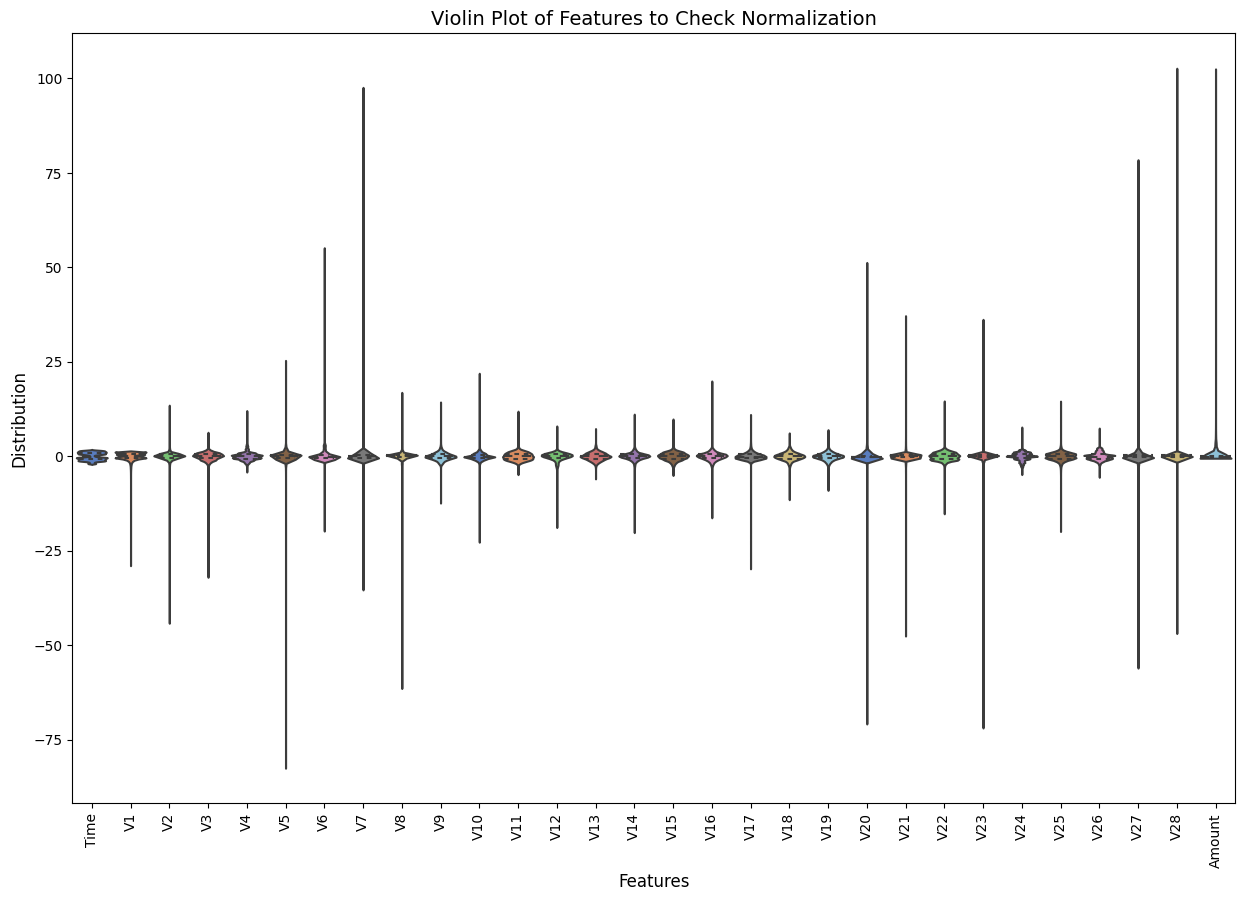

In [10]:
# violin plot for features
plt.figure(figsize=(15, 10))
sns.violinplot(data=X_scaled, scale='width', inner='quartile', palette='muted')
plt.title('Violin Plot of Features to Check Normalization', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.xticks(np.arange(30), X.columns, rotation=90)
plt.show()

In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

To tackle the class umbalanced problem, an oversampling technique to augment the samples of class 1 (fraud)

In [12]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

([<matplotlib.axis.XTick at 0x78ec54455f00>,
 [Text(0, 0, 'Non-Fraud'), Text(1, 0, 'Fraud')])

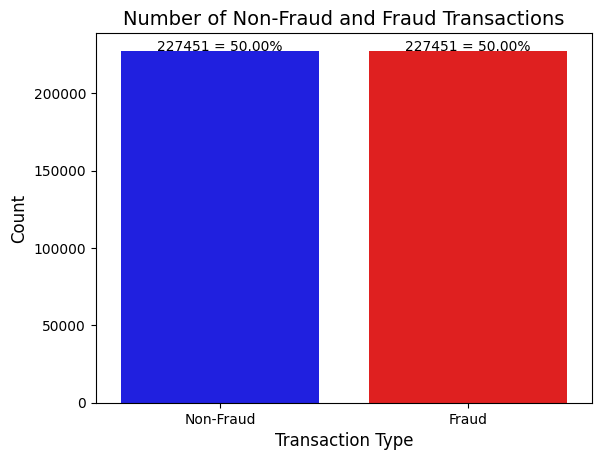

In [13]:
# show the distribution of the target variable after applying SMOTE
class_counts_smote = y_train_smote.value_counts()

# Plot the bar plot for the number of frauds and non-frauds with count on top of the bars
colors = ['blue', 'red']
sns.barplot(x=class_counts_smote.index, y=class_counts_smote.values, palette=colors)

# Add count labels on top of the bars
for i, count in enumerate(class_counts_smote.values):
    percentage = count/len(X_train_smote) * 100
    plt.text(i, count, f"{count} = {percentage:.2f}%", ha='center')

# Customize the plot
plt.title('Number of Non-Fraud and Fraud Transactions', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], class_labels, fontsize=10)

With this tecnique now both classes are balanced with a 50/50 distribution, now we can show the distribution of this sinthetic samples in the following scatter plot

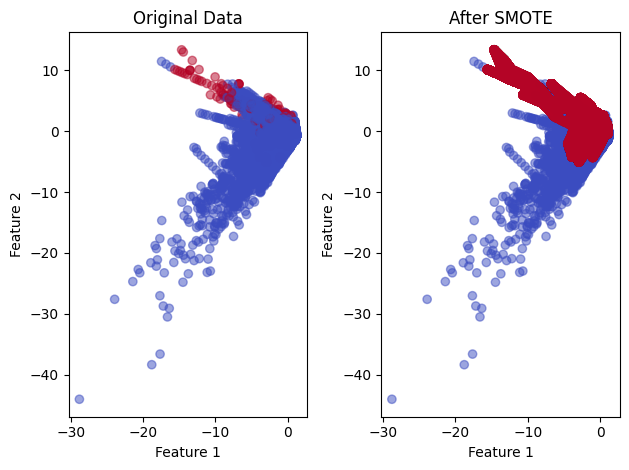

In [14]:
# Original data scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, alpha=0.5, cmap='coolwarm')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# SMOTE-generated data scatter plot
plt.subplot(1, 2, 2)
plt.scatter(X_train_smote[:, 1], X_train_smote[:, 2], c=y_train_smote, alpha=0.5, cmap='coolwarm')
plt.title('After SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


## 🗳️ Feature selection

Before starting to try random models with all combination of features let's do an analysis on what features might fit better to this problem

### Correlation analysis

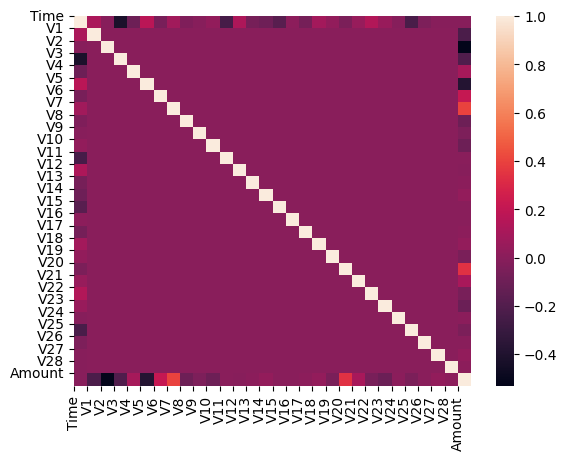

In [15]:
corr_matrix = pd.DataFrame(X_scaled, columns=data.drop(['Class'], axis=1).columns).corr()
plt.figsize=(20,20)
sns.heatmap(corr_matrix)
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=0)
plt.show()

In [16]:
# find corr_matrix values where it's absolute value is greater than 0.4 and print indices
high_corr = corr_matrix[abs(corr_matrix) > 0.3].stack().dropna()
high_corr = high_corr[high_corr.index.get_level_values(0) != high_corr.index.get_level_values(1)]
high_corr

Time    V3       -0.419618
V2      Amount   -0.531409
V3      Time     -0.419618
V5      Amount   -0.386356
V7      Amount    0.397311
V20     Amount    0.339403
Amount  V2       -0.531409
        V5       -0.386356
        V7        0.397311
        V20       0.339403
dtype: float64

### Feature Importance from Tree-based Models

In [17]:
importances = RandomForestClassifier(random_state=42).fit(X_train_smote, y_train_smote).feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.drop(['Class'], axis=1).columns, 
                                      'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(10)['Feature'].tolist()
print(feature_importance_df.head(10))  # Top 10 features

   Feature  Importance
14     V14    0.189393
10     V10    0.112716
4       V4    0.109369
12     V12    0.091854
17     V17    0.088626
3       V3    0.063776
11     V11    0.048797
16     V16    0.045896
2       V2    0.037971
9       V9    0.025789


### RFE method (Recursive Feature Elimination)

In [18]:
# Feature selection using Recursive Feature Elimination (RFE)
estimator = LogisticRegression(random_state=42, max_iter=500)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_train_smote, y_train_smote)
selected_features = selector.support_
selected_feature_names = data.drop(['Class'], axis=1).columns[selected_features]
rfe_features = selected_feature_names.tolist()
print("Selected Features:", selected_feature_names)

Selected Features: Index(['V4', 'V5', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17'], dtype='object')


### PCA to reduce dimentionality and get new features

In [19]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

### Organize all feature sets obtained from all previous methods

In [20]:
# Organize feature sets
feature_sets = {
    "High Correlation": high_corr.index.get_level_values(0).unique().tolist(),
    "Feature Importance": top_features,
    "RFE": rfe_features,
    "PCA": X_train_pca
}
feature_sets

{'High Correlation': ['Time', 'V2', 'V3', 'V5', 'V7', 'V20', 'Amount'],
 'Feature Importance': ['V14',
  'V10',
  'V4',
  'V12',
  'V17',
  'V3',
  'V11',
  'V16',
  'V2',
  'V9'],
 'RFE': ['V4', 'V5', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17'],
 'PCA': array([[ -8.45175538,   1.03005476,  -1.09845364, ...,   0.36717245,
          -0.4114535 ,   0.03867058],
        [ -8.44050145,   1.02603396,  -1.07587379, ...,  -0.09255781,
           0.33742627,  -0.27838775],
        [ -8.24206993,   5.67157112,   1.06576488, ...,  -1.91722521,
           0.89722517,   0.84759115],
        ...,
        [ -2.49657936,  -0.39611938,   1.20052608, ...,   0.18753827,
          -0.79898836,   1.3873237 ],
        [ 10.43338318,  -3.40278149,   2.47384173, ...,   0.23700066,
          -4.02416148,   2.09695674],
        [ 26.80454538,   3.65042111, -15.50655459, ...,  -0.8660192 ,
          -1.25904307,   0.93818053]])}

## 🛠️🧱 Model building

We want to try all classifiers used in original paper to compare results.

In [21]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500)   
}

In [22]:
# Evaluate classifiers on different feature sets
results = {}

for feature_name, selected_features in feature_sets.items():
    X_train_selected = X_train_smote if feature_name == "PCA" else X_train_smote[:, [X.columns.get_loc(f) for f in selected_features]]
    X_test_selected = X_test if feature_name == "PCA" else X_test[:, [X.columns.get_loc(f) for f in selected_features]]
    
    for clf_name, clf in classifiers.items():
        clf.fit(X_train_selected, y_train_smote)
        y_pred = clf.predict(X_test_selected)
        auc = roc_auc_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        results[(feature_name, clf_name)] = {
            "AUC": auc,
            "Accuracy": report['accuracy'] if 'accuracy' in report else 'N/A',
            "Precision": report['1']['precision'],
            "Recall": report['1']['recall'],
            "F1-Score": report['1']['f1-score']
        }

In [23]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

                                             AUC  Accuracy  Precision  \
High Correlation   Random Forest        0.866529  0.997911   0.436364   
                   Decision Tree        0.832883  0.991749   0.130952   
                   Neural Network       0.886315  0.986570   0.093788   
                   Naive Bayes          0.842881  0.971033   0.041371   
                   Logistic Regression  0.889722  0.932358   0.021168   
Feature Importance Random Forest        0.923179  0.999157   0.715517   
                   Decision Tree        0.911524  0.996226   0.290323   
                   Neural Network       0.922282  0.997367   0.380734   
                   Naive Bayes          0.935419  0.982918   0.082936   
                   Logistic Regression  0.945300  0.972139   0.053925   
RFE                Random Forest        0.918007  0.998999   0.666667   
                   Decision Tree        0.896245  0.996226   0.285714   
                   Neural Network       0.911938  0